In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from sklearn.cluster import KMeans

In [2]:
#Load the dataset and display it to have an idea of what the data looks like
dataset=pd.read_csv('///Users/markjuvert/Desktop/KMeans/kmeans.csv')
dataset.describe()

,Pit,Revenue Factor,Max Rev Ftr,Rock Tonnes,Ore Tonnes,Strip Ratio,Max Bench,Min Bench,Limestone Units,Limestone Grade
count,58.000000,58.000000,58.000000,5.800000e+01,5.800000e+01,58.000000,58.0,58.0,5.800000e+01,58.000000
mean,29.500000,1.027931,1.036552,1.234416e+09,9.321659e+08,0.323621,22.0,1.0,4.195517e+10,45.011707
std,16.886879,0.502191,0.509284,3.292167e+07,1.910563e+06,0.032320,0.0,0.0,7.985165e+07,0.001947
min,1.000000,0.300000,0.300000,1.156606e+09,9.258239e+08,0.250000,22.0,1.0,4.170000e+10,45.006000
25%,15.250000,0.585000,0.585000,1.212247e+09,9.313843e+08,0.302500,22.0,1.0,4.190000e+10,45.011250
50%,29.500000,0.950000,0.950000,1.234744e+09,9.326922e+08,0.320000,22.0,1.0,4.200000e+10,45.012000
75%,43.750000,1.410000,1.415000,1.263748e+09,9.336160e+08,0.350000,22.0,1.0,4.200000e+10,45.013000
max,58.000000,2.000000,2.000000,1.276607e+09,9.339203e+08,0.370000,22.0,1.0,4.200000e+10,45.014000


In [3]:
#For visualization convenience, we are going to take pit, revenue factor and stripping ratio as our data.
X = dataset.iloc[:, [0, 5]].values

In [4]:
#Choosing the number of iterations. If the algorithms arrive at the best locations, increasing the number of iterations won't change the results
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=100

In [5]:
K=5 # number of clusters. We choose a random number of clusters. later the Elbow method will be used to determine the right number of cluster

In [6]:
#Initialize the centroids randomly from the data points
Centroids=np.array([]).reshape(n,0) 

In [7]:
#Centroids is a n x K dimentional matrix, where each column will be a centroid for one cluster
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

In [8]:
#For each training example compute the euclidian distance from the centroid and assign the cluster based on the minimal distance to a point
Output={}

In [9]:
#Finding EuclidianDistance
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
           tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
           EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)+1

In [10]:
#Regroup data into clusters
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

In [11]:
#Searching for convergence
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

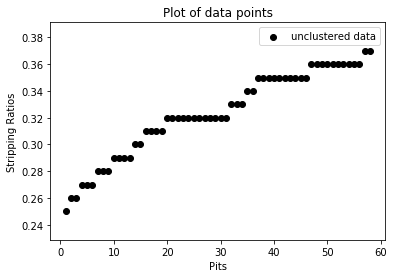

In [12]:
#Let's visualize the original data
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Pits')
plt.ylabel('Stripping Ratios')
plt.legend()
plt.title('Plot of data points')
plt.show()

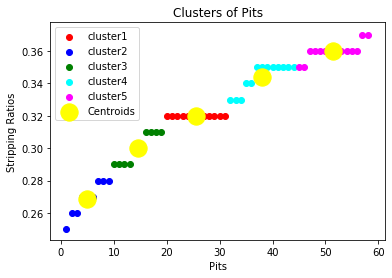

In [13]:
#Visualization of the clustered data
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.title('Clusters of Pits')
plt.xlabel('Pits')
plt.ylabel('Stripping Ratios')
plt.legend()
plt.show()

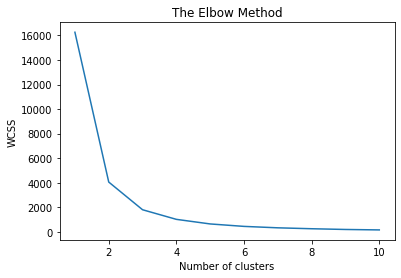

In [14]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 100)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 100)
y_kmeans = kmeans.fit_predict(X)

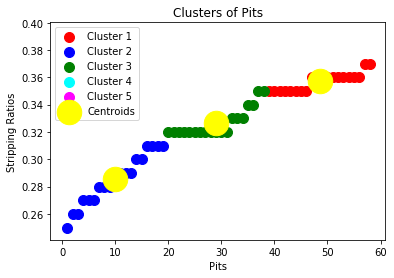

In [16]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 600, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Pits')
plt.xlabel('Pits')
plt.ylabel('Stripping Ratios')
plt.legend()
plt.show()

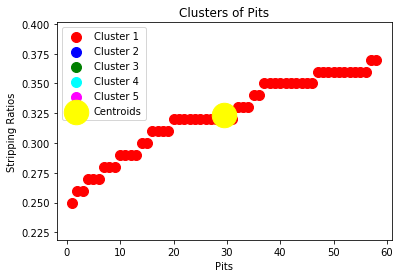

In [17]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 1, init = 'k-means++', random_state = 100)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 600, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Pits')
plt.xlabel('Pits')
plt.ylabel('Stripping Ratios')
plt.legend()
plt.show()